### Mounting Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Dataframe Enquiry


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/EDI/Sanket_Im/back_up/Dataset/dataset.csv")
df
print(df.shape)

(11500, 180)


### Feature Label extraction

In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1:]

Feature

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


Label


In [ ]:
y

,y
0,4
1,1
2,5
3,5
4,5
...,...
11495,2
11496,1
11497,5
11498,3


### Feature Engineering

#### Multi label to binary label conversion

In [ ]:
def toBinary(x):
    if x != 1: return 0;
    else: return 1;

In [ ]:
y = y['y'].apply(toBinary)
y = pd.DataFrame(data=y)
y

,y
0,0
1,1
2,0
3,0
4,0
...,...
11495,0
11496,1
11497,0
11498,0


#### Feature Scaling

In [ ]:
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [ ]:
y

,y
0,0
1,1
2,0
3,0
4,0
...,...
11495,0
11496,1
11497,0
11498,0


### Splitting Data (Train-Test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [ ]:
x_test.iloc[1]

X1      -39
X2      -32
X3      -21
X4      -14
X5       -9
       ... 
X174   -154
X175   -129
X176    -94
X177    -46
X178      1
Name: 1570, Length: 178, dtype: int64

### Logistic Regression - Model 1

**Training data accuracy evaluation**

In [ ]:
clf = LogisticRegression() #initializing logistic regression
clf.fit(x_train, y_train) #training the model with train data(input, output)
acc_log_reg = clf.score(x_train, y_train) * 100
print("Training Accuracy: ",round(acc_log_reg,2), "%")

Training Accuracy:  66.92 %


**Validation Data accuracy evaluation**

In [ ]:
y_pred_log_reg = clf.predict(x_test)
acc_log_reg2 = round(clf.score(x_test, y_test) * 100, 2)
print("Validation Accuracy: ",acc_log_reg2, "%")

Validation Accuracy:  63.9 %


***Confusion Matrix***

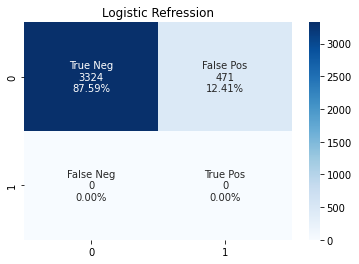

In [ ]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('Logistic Refression')
plt.show()

***Model Report***


In [ ]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      3025
           1       0.26      0.42      0.32       770

    accuracy                           0.64      3795
   macro avg       0.54      0.56      0.54      3795
weighted avg       0.71      0.64      0.67      3795



### SVM - Model 2

**Training data accuracy evaluation**

In [ ]:
clf = SVC(probability=True) #initializing svm classifier
clf.fit(x_train, y_train) #training the model with train data(input, output)
acc_svc1 = clf.score(x_train, y_train) * 100
print("Training Accuracy: ",round(acc_svc1,2), '%')

Training Accuracy:  98.09 %


**Validation Data accuracy evaluation**

In [ ]:
y_pred_svc = clf.predict(x_test)
acc_svc2 = round(clf.score(x_test, y_test) * 100, 2)
print("Validation Accuracy: ",acc_svc2, "%")

Validation Accuracy:  97.23 %


***Confusion Matrix***

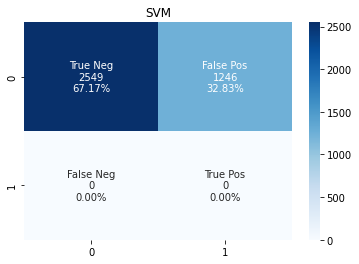

In [ ]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('SVM')
plt.show()

***Model Report***


In [ ]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3025
           1       0.96      0.90      0.93       770

    accuracy                           0.97      3795
   macro avg       0.97      0.95      0.96      3795
weighted avg       0.97      0.97      0.97      3795



### KNN - Model 4

**Train Data accuracy evaluation**

In [ ]:
clf = KNeighborsClassifier() #initializing svm classifier
clf.fit(x_train, y_train) #training the model with train data(input, output)
acc_knn1 = clf.score(x_train, y_train) * 100
print("Training Accuracy: ",round(acc_knn1,2), '%')

Training Accuracy:  93.61 %


**Test Data accuracy evaluation**

In [ ]:
y_pred_knn = clf.predict(x_test)
acc_knn2 = round(clf.score(x_test, y_test) * 100, 2)
print("Validation Accuracy: ",acc_knn2, "%")

Validation Accuracy:  91.96 %


***Confusion Matrix***

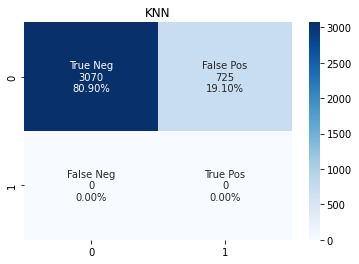

In [ ]:
cf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)


group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('KNN')
plt.show()

***Model Report***


In [ ]:
predictions = clf.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3025
           1       0.99      0.61      0.75       770

    accuracy                           0.92      3795
   macro avg       0.95      0.80      0.85      3795
weighted avg       0.93      0.92      0.91      3795



### feature engineering

In [ ]:
y = to_categorical(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)
X_train = x_train
X_test = x_test

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))

x_test = scaler.fit_transform(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

In [ ]:
print(type(x_train))
print(type(x_test))
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### LSTM / BiLSTM - NN Model- 1

In [ ]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(64, input_shape=(1,178),activation="relu",return_sequences=True))
model.add(LSTM(32,activation="sigmoid"))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             62208     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 74,690
Trainable params: 74,690
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
241/241 [==============================] - 4s 5ms/step - loss: 0.3540 - accuracy: 0.8671
Epoch 2/10
241/241 [==============================] - 1s 5ms/step - loss: 0.1226 - accuracy: 0.9709
Epoch 3/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0746 - accuracy: 0.9795
Epoch 4/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0538 - accuracy: 0.9855
Epoch 5/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0409 - accuracy: 0.9897
Epoch 6/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0298 - accuracy: 0.9933
Epoch 7/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0236 - accuracy: 0.9947
Epoch 8/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0190 - accuracy: 0.9962
Epoch 9/10
241/241 [==============================] - 1s 4ms/step - loss: 0.0157 - accuracy: 0.9968
Epoch 10/10
241/241 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9977

Train data


In [ ]:
scoreTrain, accTrain = model.evaluate(x_train, y_train)
print("Training Accuracy: ",round(accTrain*100, 2), '%')

241/241 [==============================] - 1s 2ms/step - loss: 0.0082 - accuracy: 0.9986
Training Accuracy:  99.86 %


Validation Data

In [ ]:
scoreTest, accTest = model.evaluate(x_test, y_test)
print(y_test)
print("Validation Accuracy: ",round(accTest*100, 2), '%')

119/119 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9736
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Validation Accuracy:  97.36 %


Individual check

In [ ]:
print(x_test[22,:])
print(y_test[22,:])

[[-3.92375681e-01 -3.44224854e-01 -2.13054865e-01 -1.29073181e-01
  -3.78346245e-02  1.88792268e-02  5.79765664e-02  1.04270602e-01
   9.58408565e-02 -7.75820900e-03 -6.81683622e-02 -1.20903956e-02
   1.73987705e-01  2.34631785e-01  1.07039395e-01 -9.88647517e-02
  -2.87377839e-01 -2.91177934e-01 -9.12416840e-02  9.42496244e-02
   1.09010807e-01  3.70842359e-02  4.47212217e-02  8.98404876e-02
   1.89762491e-01  1.87153014e-01  1.68213482e-01  2.85922606e-02
   9.43183470e-03  4.71008313e-02  9.89321501e-02  4.61208583e-02
  -1.84027584e-01 -3.62864044e-01 -4.34865856e-01 -2.45344922e-01
   9.53280717e-02  2.80913244e-01  2.14808703e-01  1.07427444e-02
  -2.21193610e-01 -4.16265980e-01 -4.35770586e-01 -3.79887095e-01
  -2.47724067e-01 -8.48721739e-02  7.83488730e-02  1.87322251e-01
   1.59646952e-01  5.26479041e-02 -7.18363235e-02 -1.37043626e-01
  -1.85482043e-01 -9.42084584e-02  6.55838754e-02  2.34866353e-01
   3.50056630e-01  3.03029298e-01  1.10762367e-01 -7.49188306e-02
  -5.82197

In [ ]:
scoreTest, accTest = model.evaluate(x_test[[44],:], y_test[[44],:])
print(round(accTest*100, 2), '%')

1/1 [==============================] - 0s 20ms/step - loss: 0.0030 - accuracy: 1.0000
100.0 %


In [ ]:
print(model.predict(x_test[[44],:]))

1/1 [==============================] - 0s 286ms/step
[[0.9970258  0.00297427]]


In [ ]:
temp = model.predict(x_test)
print(temp.tolist())
y_pred_lstm = []
for i in temp.tolist():
  y_pred_lstm.append(i.index(max(i)))
print(y_pred_lstm)


print(temp.tolist())
y_act_lstm = []
for i in y_test.tolist():
  y_act_lstm.append(i.index(max(i)))
print(y_act_lstm)



119/119 [==============================] - 0s 2ms/step
[[0.9999151825904846, 8.48101481096819e-05], [0.9998416900634766, 0.00015835618251003325], [0.9997369050979614, 0.000263118912698701], [0.9997307062149048, 0.00026934919878840446], [0.9997341632843018, 0.00026591599453240633], [0.9998397827148438, 0.0001601345429662615], [0.9994717240333557, 0.0005282341153360903], [0.9995250105857849, 0.0004749984946101904], [0.9998025894165039, 0.00019741227151826024], [0.011451223865151405, 0.9885486960411072], [0.9918886423110962, 0.008111312985420227], [0.9997460842132568, 0.0002539335691835731], [0.9998927712440491, 0.00010715677490225062], [0.006777600385248661, 0.9932222962379456], [0.9998902678489685, 0.0001096954511012882], [0.002420021453872323, 0.9975799322128296], [0.9999493956565857, 5.0562295655254275e-05], [0.002589904936030507, 0.9974100589752197], [0.9985926151275635, 0.0014073261991143227], [0.002388153225183487, 0.9976118206977844], [0.9997307062149048, 0.0002693260903470218], [

In [ ]:

cf_matrix = confusion_matrix(y_act_lstm, y_pred_lstm)

print(cf_matrix)

[[2991   34]
 [  66  704]]


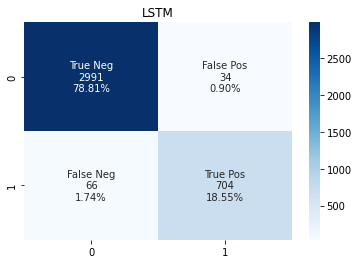

In [ ]:

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = plt.axes() # label
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=ax)
ax.set_title('LSTM')
plt.show()

In [ ]:
print(classification_report(y_act_lstm, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3025
           1       0.95      0.91      0.93       770

    accuracy                           0.97      3795
   macro avg       0.97      0.95      0.96      3795
weighted avg       0.97      0.97      0.97      3795

